<a href="https://colab.research.google.com/github/neohack22/ebw3nt/blob/main/Lab_de_FunctionalAPIMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow.keras

# Chargement des données MNIST

Vous devez préparer un jeu de données pour entraîner un modèle de reconnaissance d’images de chiffres manuscrits.
>
> * Quelle bibliothèque Python pourriez-vous utiliser pour accéder à un dataset standard de chiffres manuscrits ?
> * Écrivez le code permettant de **charger ce dataset** et de le séparer en données d’entraînement et de test.
> * Assurez-vous que vos variables contiennent à la fois **les images** et **les labels correspondants**.

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


# Préparation des données

In [ ]:
"""
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
"""

On travaille ici avec **le dataset MNIST**, qui contient des images de chiffres manuscrits (0 à 9) :

* `train_images` → 60 000 images pour l’entraînement
* `test_images` → 10 000 images pour le test

Chaque image est initialement de taille **28x28 pixels**.

---

1. **`reshape((60000, 28*28))`**

   * Chaque image 28x28 est transformée en un vecteur de 784 pixels (`28*28 = 784`).
   * Pourquoi ? Les réseaux de neurones classiques (dense/fc) attendent **des vecteurs 1D**, pas des matrices 2D.

2. **`astype('float32') / 255`**

   * Les valeurs des pixels vont de 0 à 255 (entiers).
   * On les convertit en **float32** et on les normalise entre 0 et 1.
   * Pourquoi ? Les réseaux apprennent mieux et plus rapidement avec des données normalisées.

---

* Les labels initiaux sont des entiers de 0 à 9.
* `to_categorical` les transforme en **vecteurs “one-hot”** :

| label | one-hot               |
| ----- | --------------------- |
| 3     | [0,0,0,1,0,0,0,0,0,0] |

* Pourquoi ? Les sorties du réseau utilisent **softmax**, qui calcule la probabilité pour chaque classe. Le one-hot est nécessaire pour calculer correctement la **loss** (erreur) pendant l’entraînement.

1. **Images** : convertir les matrices 2D en vecteurs 1D et normaliser.
2. **Labels** : convertir les entiers en vecteurs one-hot pour l’apprentissage multiclasses.

# Définition du réseau

In [ ]:
"""
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
"""

* On crée un réseau simple à **2 couches** :

  1. Une couche cachée avec 512 neurones pour apprendre les patterns.
  2. Une couche de sortie avec 10 neurones pour prédire 10 classes.
* Les images doivent être **aplatis** en vecteurs avant d’entrer dans le réseau.
* La couche cachée utilise `ReLU` pour l’apprentissage, la couche finale `Softmax` pour produire des probabilités.

---

* `keras` est une bibliothèque Python pour créer et entraîner des **réseaux de neurones** facilement.
* `models` contient des structures de réseaux (comme `Sequential`).
* `layers` contient les **couches de neurones** que l’on peut ajouter à un réseau.

---

* `Sequential` signifie que les couches seront **empilées les unes après les autres**.
* On construit un réseau **linéaire**, simple à comprendre et à entraîner.

---

### Première couche dense (fully connected)

```python
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
```

* `Dense` = **couche complètement connectée**, chaque neurone est relié à tous les neurones de la couche précédente.
* `512` = nombre de neurones dans cette couche.
* `activation='relu'` = fonction d’activation **ReLU** (Rectified Linear Unit), qui introduit de la **non-linéarité** pour permettre au réseau d’apprendre des relations complexes.
* `input_shape=(28*28,)` = taille de l’entrée. Ici, on suppose que chaque entrée est une image de **28x28 pixels** aplatie en un vecteur de 784 valeurs : c’est comme donner au réseau une **liste de 784 valeurs** et lui demander de trouver des patterns.

---

### Couche de sortie

```python
network.add(layers.Dense(10, activation='softmax'))
```

* 10 neurones = **10 classes** à prédire (ex : chiffres de 0 à 9 si on travaille sur MNIST).
* `activation='softmax'` = transforme les sorties en **probabilités** qui s’additionnent à 1.
* Chaque neurone représente la probabilité que l’entrée appartienne à cette classe : la dernière couche **donne la décision finale du modèle** sous forme de probabilités.

## L'API fonctionnelle : définition du réseau

### Création d'un nœud d'entrée

In [ ]:
from tensorflow import keras

# specify the shape of each data sample: 784-dimensional vectors
inputs = keras.Input(shape=(784,), name='img')
# the batch size is always omitted: inputs = keras.Input(shape=(784,))

On définit une entrée de modèle qui attend des vecteurs de 784 valeurs, que l’on nomme `img`. Cette étape est nécessaire pour construire un modèle de type **Functional API** dans Keras :

1. **`keras.Input()`** :

   * C’est la manière dont on définit l’entrée d’un réseau de neurones dans Keras (qui fait partie de TensorFlow).
   * On crée un point d’entrée pour les données que le modèle va recevoir.

2. **`shape=(784,)`** :

   * Cela décrit la forme des données attendues.
   * Ici, `(784,)` signifie que chaque donnée d’entrée est un vecteur de **784 valeurs**.
   * Typiquement, c’est utilisé pour des images 28x28 pixels (comme dans le dataset MNIST) que l’on a **aplatis** en un vecteur unique : 28 × 28 = 784.

3. **`name='img'`** :

   * On donne un nom à cette entrée pour pouvoir la référencer plus facilement dans le modèle ou lors de la visualisation de l’architecture.

### Informations à fournir au modèle (autre méthode)

In [ ]:
"""
inputs.shape = TensorShape([None, 784])
inputs.dtype = tf.float32
"""

On prépare un ensemble de données où chaque exemple est un vecteur de 784 valeurs flottantes, et on peut traiter n’importe quel nombre d’exemples à la fois.

Ici, `inputs` représente les **données d’entrée** pour un modèle (par exemple, des images aplaties d’un dataset comme MNIST).

---

* `shape` signifie la **forme** du tenseur (c’est-à-dire sa dimension).
* `[None, 784]` indique que :

  * `784` → chaque donnée d’entrée a 784 **éléments**, par exemple une image de 28×28 pixels aplatie.
  * `None` → le nombre d’exemples peut varier, donc on ne le fixe pas à l’avance.
* En pratique : on peut envoyer **n’importe quel nombre d’images** à la fois au modèle.

Les calculs dans les réseaux de neurones nécessitent souvent des flottants pour être précis et efficaces :
* `dtype` signifie **type de données**.
* `tf.float32` → chaque élément du tenseur est un nombre en **32 bits à virgule flottante**.

### Créer un nouveau nœud dans le graphe des couches

In [ ]:
# calling a layer on this inputs object

from tensorflow.keras import layers

# drawing an arrow from "inputs" to this layer we created
dense = layers.Dense(64, activation='relu')
# "passing" the inputs to the dense layer, and out we get x
x = dense(inputs)

`inputs` représente les données d’entrée que le réseau va traiter (par exemple, des caractéristiques d’un client, d’une image, etc.).

### Étape 1 : Créer une couche Dense

```python
dense = layers.Dense(64, activation='relu')
```

* `Dense` est une couche **complètement connectée**, c’est-à-dire que chaque neurone de cette couche est connecté à tous les neurones de la couche précédente.
* `64` indique le **nombre de neurones** dans cette couche.
* `activation='relu'` applique la fonction d’activation **ReLU**, qui transforme les valeurs pour ajouter de la non-linéarité et aider le réseau à apprendre des relations complexes.

---

### Étape 2 : “Passer” les données à travers la couche

```python
x = dense(inputs)
```

* Ici, on **applique la couche Dense à nos données d’entrée** (`inputs`).
* En d’autres termes, les données passent dans tous les neurones de cette couche, avec les poids initiaux.
* La sortie est stockée dans `x`, qui est une **nouvelle représentation de nos données**, enrichie par la transformation de la couche Dense.

### Ajouter quelques couches supplémentaires au graphe des couches

In [ ]:
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

* La première couche (`relu`) apprend des **représentations internes**.
* La deuxième couche (`softmax`) transforme ces représentations en **décision finale** sous forme de probabilités.

---

1. **`x = layers.Dense(64, activation='relu')(x)`**

   * Ici, on crée une **couche dense** (fully connected) avec **64 neurones**.
   * Chaque neurone reçoit toutes les sorties de la couche précédente.
   * L’activation `relu` signifie que chaque neurone renvoie zéro si l’entrée est négative, et la valeur elle-même si elle est positive.
   * En pratique : cette couche va apprendre à extraire des **caractéristiques utiles** pour notre tâche (ex: classification d’images ou de textes).

2. **`outputs = layers.Dense(10, activation='softmax')(x)`**

   * On crée une deuxième couche dense, mais cette fois avec **10 neurones**, correspondant au **nombre de classes à prédire**.
   * L’activation `softmax` transforme les sorties en **probabilités**, donc chaque neurone donne la probabilité que l’entrée appartienne à une classe particulière.
   * En pratique : le réseau va prédire **quelle classe est la plus probable** pour chaque exemple.

### Créer un modèle en spécifiant ses entrées et ses sorties dans le graphe des couches

In [ ]:
# model = keras.Model(inputs=inputs, outputs=outputs)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

Dans Keras, on définit un **modèle** en précisant ses **entrées** (`inputs`) et ses **sorties** (`outputs`). C’est ainsi que le framework sait comment connecter les différentes couches entre elles et comment faire passer les données.

---

* `inputs=inputs` : on indique quelles sont les **données d’entrée** du modèle (ex. des images de chiffres pour MNIST).
* `outputs=outputs` : on indique la **sortie attendue** du modèle (ex. les probabilités pour chaque chiffre de 0 à 9).
* `name='mnist_model'` : on **donne un nom** au modèle, ce qui est pratique pour l’identification et le suivi, notamment si on a plusieurs modèles dans un projet.

> Sans le nom, Keras attribue un nom générique automatiquement (`model_1`, `model_2`, …). Ici, on choisit un nom explicite pour mieux suivre le modèle dans le code et dans les rapports.

### Processus de définition du modèle complet (rappel)

In [ ]:
"""
inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')
"""

### Afficher les formes d'entrée et de sortie de chaque couche

In [ ]:
keras.utils.plot_model(model, 'my_fist_model_with_shape_info.png', \
                       show_shapes=True)

```python
keras.utils.plot_model(model, 'my_fist_model_with_shape_info.png', show_shapes=True)
```

sert à **visualiser l’architecture d’un modèle Keras** sous forme de schéma :

1. **`keras.utils.plot_model`**

   * C’est une fonction utilitaire de Keras.
   * Elle permet de créer une image qui représente les différentes couches du modèle, comment elles sont connectées, et éventuellement leurs dimensions.

2. **`model`**

   * C’est le modèle Keras que vous avez créé (par exemple un `Sequential` ou un modèle fonctionnel).
   * La fonction va analyser ses couches et leur enchaînement.

3. **`'my_fist_model_with_shape_info.png'`**

   * C’est le nom du fichier image qui sera généré.
   * Ici, le schéma sera sauvegardé sur votre disque avec ce nom.

4. **`show_shapes=True`**

   * Cela demande à afficher **la taille des tenseurs** (les dimensions des données) à chaque couche du modèle.
   * Par exemple, pour une couche Dense qui reçoit un vecteur de taille 128 et produit un vecteur de taille 64, vous verrez `(128,) -> (64,)`.
   * Très utile pour **vérifier que les dimensions correspondent** tout au long du réseau.

---

* Permet de **visualiser rapidement la structure** d’un modèle complexe.
* Aide à **diagnostiquer des erreurs de dimension**.
* Utile pour **documenter vos modèles** dans un rapport ou une présentation.

# Définition de l'optimiseur et de la fonction de perte

In [ ]:
"""
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', \
                metrics=['accuracy'])
"""

Cette ligne prépare le réseau pour l’entraînement, en lui disant comment apprendre (`optimizer`), comment mesurer son erreur (`loss`) et comment suivre ses performances (`metrics`).

1. **`network.compile()`**
   Cette fonction dit au réseau : *« Voici comment tu dois apprendre et comment évaluer tes résultats »*.
   C’est une étape obligatoire avant de lancer l’entraînement (`network.fit()`).

2. **`optimizer='rmsprop'`**
   L’optimiseur contrôle **la façon dont le réseau ajuste ses paramètres** pour mieux prédire.

   * `rmsprop` est un algorithme efficace, souvent utilisé pour les réseaux de neurones qui traitent des données séquentielles ou avec beaucoup de paramètres.

3. **`loss='categorical_crossentropy'`**
   La fonction de perte mesure **l’écart entre les prédictions du réseau et la réalité**.

   * `categorical_crossentropy` est adaptée quand on a **plusieurs classes possibles** (classification multiple). Par exemple, reconnaître le type de fruit parmi pomme, banane, orange.

4. **`metrics=['accuracy']`**
   Les métriques permettent de suivre **la performance du modèle pendant l’entraînement**.

   * `accuracy` signifie qu’on regarde le **pourcentage de prédictions correctes**.

In [ ]:
# Training the network

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2585 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1041 - acc: 0.9680
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0685 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0491 - acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0369 - acc: 0.9890


### Test du réseau

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test_acc: 0.9773


# demo

Construire et entraîner un réseau de neurones pour classer les images de chiffres manuscrits (0 à 9) du dataset MNIST.

**Consignes :**

1. Chargez le dataset MNIST depuis `keras.datasets`.
2. Préparez les données :

   * Transformez chaque image en vecteur plat (`flatten`) de taille 784.
   * Normalisez les valeurs des pixels pour qu’elles soient comprises entre 0 et 1.
3. Créez un modèle Keras adapté à la classification de 10 classes.
4. Compilez le modèle en utilisant :

   * une fonction de perte adaptée aux labels entiers,
   * un optimiseur de votre choix,
   * et l’accuracy comme métrique.
5. Entraînez le modèle sur le train set avec un `batch_size` de 64, pour 5 époques, et utilisez 20% des données pour la validation.
6. Évaluez votre modèle sur le test set et affichez la **loss** et l’**accuracy**.

**Bonus (optionnel) :**

* Essayez différents optimisateurs et comparez les performances.
* Tracez la courbe de loss et d’accuracy pendant l’entraînement.

# Sauvegarde et sérialisation

In [ ]:
model.save('path_to_my_model.h5')

# Recreate the exact same model purely from the file
model = keras.models.load_model('path_to_my_model.h5')

Lorsqu’on entraîne un modèle Keras/TensorFlow, le fichier .h5 peut stocker :
- La structure du modèle (les couches, leurs connexions)
- Les poids entraînés (paramètres appris par le modèle)
- Les configurations d’entraînement (optimizer, métriques, etc.)

Ainsi, on peut sauvegarder et recharger un modèle complet facilement.

# Modèle d'auto-encodeur de bout en bout pour l'entraînement

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16)

On construit ici un **encodeur de réseau de neurones convolutif (CNN)**. L’objectif est de transformer une image en une représentation compacte (ou "embedding") qu’un modèle peut utiliser pour classification, reconstruction ou autre tâche.

---

### Étapes

1. **Définir l’entrée**

```python
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
```

* On crée un **point d’entrée** pour le modèle.
* `shape=(28, 28, 1)` signifie :

  * Hauteur : 28 pixels
  * Largeur : 28 pixels
  * Canaux : 1 (donc image en **niveau de gris**)
* `name='img'` donne un nom à cet input pour plus de clarté dans le modèle.

---

2. **Premières convolutions**

```python
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
```

* Chaque `Conv2D` applique un **filtre convolutif** pour extraire des **caractéristiques locales** (bords, textures…).
* `16` puis `32` : nombre de **filtres**, donc combien de types de motifs on détecte.
* `3` : taille du filtre (3×3 pixels).
* `activation='relu'` : fonction ReLU pour introduire de la **non-linéarité**, ce qui aide le réseau à apprendre des motifs complexes.

---

3. **Réduction de la dimension spatiale**

```python
x = layers.MaxPooling2D(3)(x)
```

* Le **max pooling** réduit la taille de l’image en ne conservant que la valeur maximale dans chaque fenêtre 3×3.
* Avantages :

  * Réduit le nombre de paramètres
  * Rend le modèle moins sensible aux petites translations
  * Accélère l’entraînement

---

4. **Convolutions supplémentaires**

```python
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16)(x)
```

* On ajoute d’autres couches pour **apprendre des motifs plus complexes**.
* La dernière couche (`Conv2D(16)`) prépare les données pour l’étape suivante (souvent un **flatten** ou un **bottleneck** si c’est un autoencodeur).

---

* **Input** → reçoit l’image.
* **Conv2D** → extrait des caractéristiques locales.
* **MaxPooling2D** → réduit la taille, conserve l’essentiel.
* **Conv2D finale** → crée une représentation compacte et riche de l’image.


## Prédire la classe d'un exemple

In [ ]:
import matplotlib.pyplot as plt

[[7.79732190e-09 4.55667948e-10 2.60996075e-07 1.15134244e-04
  2.53462399e-12 3.58231533e-09 6.89178363e-15 9.99883175e-01
  9.71018608e-08 1.36982396e-06]]


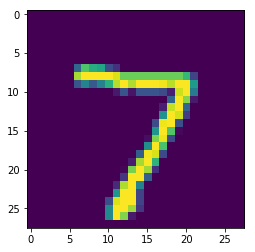

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [0])
# img = test_images [0].reshape ((1, 28 * 28))
# il faut aussi faire la division par 255 si on prend les exemples de base
test_images = test_images.astype('float32') / 255
img = test_images[0].reshape((1, 28 * 28))
print(network.predict(img))